# Final Lab 5 Code - Combines All Datasets and ML Algorithms


In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import networkx as nx
import random


Select a dataset from the following list: breast cancer, mushroom, ecoli, letter, robot
The selected dataset is not available. Please select a dataset from the following list: ['breast cancer', 'mushroom', 'ecoli', 'letter', 'robot']
Select a dataset from the following list: breast cancer, mushroom, ecoli, letter, robot
The selected dataset is not available. Please select a dataset from the following list: ['breast cancer', 'mushroom', 'ecoli', 'letter', 'robot']
Select a dataset from the following list: breast cancer, mushroom, ecoli, letter, robot
You have selected the dataset: {'Breast Cancer'}
Processed dataset:
{'data': {'ids':            ID
0      842302
1      842517
2    84300903
3    84348301
4    84358402
..        ...
564    926424
565    926682
566    926954
567    927241
568     92751

[569 rows x 1 columns], 'features':      radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      2

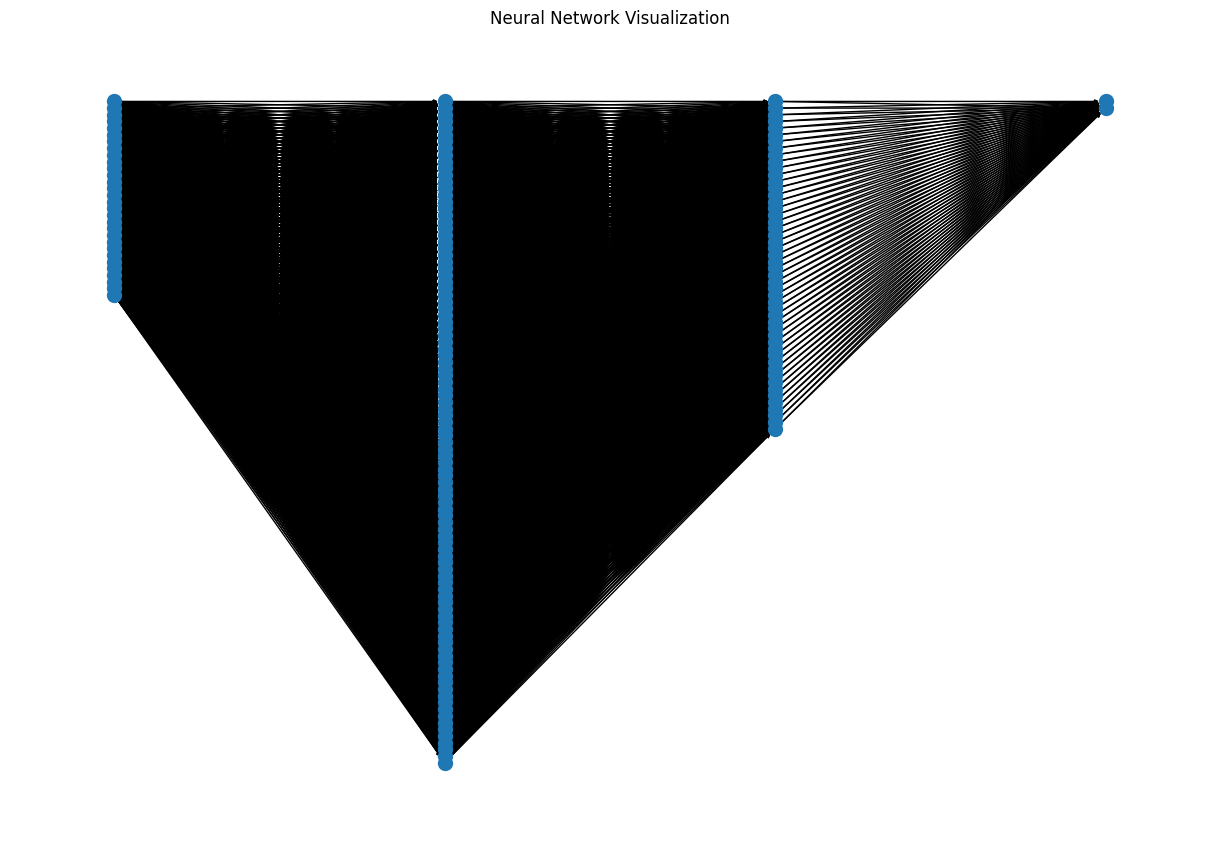

In [6]:

# List the available datasets
dataset = ["breast cancer", "mushroom", "ecoli", "letter", "robot"]

# Prompt the user to select a dataset
while True:
    print("Select a dataset from the following list: breast cancer, mushroom, ecoli, letter, robot")
    selected_dataset = input("Enter the name of the dataset: ").strip().lower()
    
    if selected_dataset in dataset:
        print("You have selected the dataset:", {selected_dataset.title()})
        break
    else:
        print("The selected dataset is not available. Please select a dataset from the following list:", dataset)

# Load and preprocess the selected dataset
if selected_dataset == "breast cancer":
    rawdataset = fetch_ucirepo(id=17)  # Breast Cancer
    target_column = "Diagnosis"  # Specific target column name
    data = pd.DataFrame(data=rawdataset.data.features, columns=rawdataset.targets)
    data[target_column] = rawdataset.data.targets
    X = data.drop(columns=[target_column]).values
    y = data[target_column].values
elif selected_dataset == "mushroom":
    rawdataset = fetch_ucirepo(id=73)  # Mushroom
    target_column = "Poisonous"  # Specific target column name
    data = pd.DataFrame(data=rawdataset.data.features, columns=rawdataset.targets)
    data[target_column] = rawdataset.data.targets
    
    # Fill missing data with 0
    data.fillna(0, inplace=True)
    
    # Transform features: Replace letters (a-z) with numbers (1-26)
    def letter_to_number(value):
        if isinstance(value, str) and value.isalpha():
            return ord(value.lower()) - ord('a') + 1
        return value
    
    data.iloc[:, :-1] = data.iloc[:, :-1].applymap(letter_to_number)
    data[target_column] = data[target_column].apply(lambda x: 1 if x == 'p' else 0)  # Convert target column to binary
    X = data.drop(columns=[target_column]).values
    y = data[target_column].values
elif selected_dataset == "ecoli":
    rawdataset = fetch_ucirepo(id=39)  # Ecoli
    target_column = "Class"  # Specific target column name
    data = pd.DataFrame(data=rawdataset.data.features, columns=rawdataset.targets)
    data[target_column] = rawdataset.data.targets
    X = data.drop(columns=[target_column]).values
    y = data[target_column].values
elif selected_dataset == "letter":
    rawdataset = fetch_ucirepo(id=59)  # Letter Recognition
    target_column = "Letter"  # Specific target column name
    data = pd.DataFrame(data=rawdataset.data.features, columns=rawdataset.targets)
    data[target_column] = rawdataset.data.targets
    X = data.drop(columns=[target_column]).values
    y = data[target_column].values
elif selected_dataset == "robot":
    rawdataset = pd.concat([
        pd.read_csv(r'C:\Users\yman7\OneDrive\Documents\YEAR 5\AI lab\Lab 5\YaseenRehman_Group4_Lab5\LP1.csv'),
        pd.read_csv(r'C:\Users\yman7\OneDrive\Documents\YEAR 5\AI lab\Lab 5\YaseenRehman_Group4_Lab5\LP2.csv'),
        pd.read_csv(r'C:\Users\yman7\OneDrive\Documents\YEAR 5\AI lab\Lab 5\YaseenRehman_Group4_Lab5\LP3.csv'),
        pd.read_csv(r'C:\Users\yman7\OneDrive\Documents\YEAR 5\AI lab\Lab 5\YaseenRehman_Group4_Lab5\LP4.csv'),
        pd.read_csv(r'C:\Users\yman7\OneDrive\Documents\YEAR 5\AI lab\Lab 5\YaseenRehman_Group4_Lab5\LP5.csv')
    ], ignore_index=True)
    if 'ok' in rawdataset.columns:
        rawdataset = rawdataset.drop(columns=['ok'])
    rawdataset['normal'] = rawdataset['normal'].ffill().fillna('normal')
    rawdataset.columns = ['Target', 'Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz'] + list(rawdataset.columns[7:])
    rawdataset.dropna(subset=['Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz'], inplace=True)
    columns = [col for col in rawdataset.columns if col != 'Target'] + ['Target']
    rawdataset = rawdataset[columns]
    target_column = "Target"  # Specific target column name
    X = rawdataset.drop(columns=[target_column]).values
    y = rawdataset[target_column].values

print("Processed dataset:")
print(rawdataset)


# Perform 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

fold_number = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Convert y_train and y_test back to DataFrame with the correct column name
    y_train = pd.DataFrame(y_train, columns=[target_column])
    y_test = pd.DataFrame(y_test, columns=[target_column])
    
    # Print the data for each fold
    print(f"\n--- Fold {fold_number} ---")
    print("Training Features (X_train):")
    print(pd.DataFrame(X_train))  # Show the first few rows
    print("\nTraining Labels (y_train):")
    print(y_train)
    print("\nTesting Features (X_test):")
    print(pd.DataFrame(X_test))  # Show the first few rows
    print("\nTesting Labels (y_test):")
    print(y_test)
    fold_number += 1

# Models available for each dataset type
classification_models = ["Logistic Regression", "Decision Tree", "KNN", "Naive Bayes", "ANN"]
regression_models = ["Linear Regression", "Decision Tree", "KNN", "Naive Bayes", "ANN"]

# Determine available models based on the selected dataset
if selected_dataset in ["breast cancer", "mushroom"]:
    available_models = classification_models
elif selected_dataset in ["ecoli", "letter", "robot"]:
    available_models = regression_models
else:
    print("Invalid dataset selected.")
    exit()

# Prompt the user to select a model
while True:
    print(f"Available models for {selected_dataset.title()}: {', '.join(available_models)}")
    selected_model = input("Enter the model you want to use: ").strip()
    
    if selected_model in available_models:
        print(f"You have selected {selected_model} for the {selected_dataset.title()} dataset.")
        break
    else:
        print("Invalid model selection. Please try again.")



if selected_model == "ANN":
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize ANN model
    ann = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

    # Store accuracies for each fold
    fold_accuracies = []

    fold_number = 1
    for train_index, test_index in kf.split(X_scaled):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the ANN model
        ann.fit(X_train, y_train)
        
        # Make predictions
        y_pred = ann.predict(X_test)
        
        # Evaluate accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)
        
        print(f"\n--- Fold {fold_number} ---")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        fold_number += 1

    # Calculate and display the average accuracy across folds
    avg_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage Accuracy across 5 folds: {avg_accuracy:.2f}")

    # Visualizing the Neural Network
    print("\nVisualizing the Neural Network...")
    input_nodes = X.shape[1]
    hidden_layers = [100, 50]
    output_nodes = len(np.unique(y))

    # Define layers for visualization
    layers = [input_nodes] + hidden_layers + [output_nodes]
    G = nx.DiGraph()
    pos = {}
    node_id = 0

    # Add nodes to the graph
    for i, layer_size in enumerate(layers):
        for j in range(layer_size):
            G.add_node(node_id, layer=i)
            pos[node_id] = (i, -j)
            node_id += 1

    # Add edges to the graph
    start_node = 0
    for i in range(len(layers) - 1):
        end_node = start_node + layers[i]
        for source in range(start_node, end_node):
            for target in range(end_node, end_node + layers[i + 1]):
                G.add_edge(source, target)
        start_node = end_node

    # Plot the neural network
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_size=100, arrowsize=5)
    plt.title("Neural Network Visualization")
    plt.show()

# If "KNN" is selected, perform KNN
elif selected_model == "KNN":
    # Encode target variable to ensure it is numeric
    if selected_dataset == "breast cancer":
        y = pd.Series(y).map({'M': 1, 'B': 0}).values  # Encode as 1 (Malignant), 0 (Benign)
    elif selected_dataset in ["ecoli", "letter", "robot"]:
        y = pd.factorize(y)[0]  # Encode multi-class target as unique integers

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Prompt user to input the number of neighbors (K)
    while True:
        try:
            k_value = int(input("Enter the number of neighbors (K) for KNN: "))
            if k_value > 0:
                break
            else:
                print("K must be a positive integer. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a positive integer.")

    # Initialize KNN model with user-defined K
    knn = KNeighborsClassifier(n_neighbors=k_value)

    # Store accuracies for each fold
    fold_accuracies = []

    fold_number = 1
    for train_index, test_index in kf.split(X_scaled):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the KNN model
        knn.fit(X_train, y_train)

        # Make predictions
        y_pred = knn.predict(X_test)

        # Evaluate accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

        print(f"\n--- Fold {fold_number} ---")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        fold_number += 1

    # Calculate and display the average accuracy across folds
    avg_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage Accuracy across 5 folds: {avg_accuracy:.2f}")

    # Visualize decision boundaries for 3 random features
    # (Use the visualization code provided earlier)
    # Randomly select 3 features for decision boundary visualization
    import random
    random_indices = random.sample(range(X_scaled.shape[1]), 3)
    X_selected = X_scaled[:, random_indices]
    selected_features = [f"Feature {i+1}" for i in random_indices]

    print(f"\nVisualizing Decision Boundaries using features: {selected_features}")

    # Plot decision boundary (2 features for simplicity)
    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    knn.fit(X_selected[:, :2], y)  # Train KNN on the first two selected features
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f"KNN Decision Boundary Visualization ({selected_features[0]} vs {selected_features[1]})")
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()
# If "KNN" is selected, perform KNN
elif selected_model == "KNN":
    # Encode target variable to ensure it is numeric
    if selected_dataset == "breast cancer":
        y = pd.Series(y).map({'M': 1, 'B': 0}).values  # Encode as 1 (Malignant), 0 (Benign)
    elif selected_dataset in ["ecoli", "letter", "robot"]:
        y = pd.factorize(y)[0]  # Encode multi-class target as unique integers

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Prompt user to input the number of neighbors (K)
    while True:
        try:
            k_value = int(input("Enter the number of neighbors (K) for KNN: "))
            if k_value > 0:
                break
            else:
                print("K must be a positive integer. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a positive integer.")

    # Initialize KNN model with user-defined K
    knn = KNeighborsClassifier(n_neighbors=k_value)

    # Store accuracies for each fold
    fold_accuracies = []

    fold_number = 1
    for train_index, test_index in kf.split(X_scaled):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the KNN model
        knn.fit(X_train, y_train)

        # Make predictions
        y_pred = knn.predict(X_test)

        # Evaluate accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

        print(f"\n--- Fold {fold_number} ---")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        fold_number += 1

    # Calculate and display the average accuracy across folds
    avg_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage Accuracy across 5 folds: {avg_accuracy:.2f}")

    # Visualize decision boundaries for 3 random features
    # (Use the visualization code provided earlier)
    # Randomly select 3 features for decision boundary visualization
    import random
    random_indices = random.sample(range(X_scaled.shape[1]), 3)
    X_selected = X_scaled[:, random_indices]
    selected_features = [f"Feature {i+1}" for i in random_indices]

    print(f"\nVisualizing Decision Boundaries using features: {selected_features}")

    # Plot decision boundary (2 features for simplicity)
    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    knn.fit(X_selected[:, :2], y)  # Train KNN on the first two selected features
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f"KNN Decision Boundary Visualization ({selected_features[0]} vs {selected_features[1]})")
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()

# If "Naive Bayes" is selected, perform Naive Bayes
elif selected_model == "Naive Bayes":
    # Encode target variable to ensure it is numeric
    if selected_dataset == "breast cancer":
        y = pd.Series(y).map({'M': 1, 'B': 0}).values  # Encode as 1 (Malignant), 0 (Benign)
    elif selected_dataset in ["ecoli", "letter", "robot"]:
        y = pd.factorize(y)[0]  # Encode multi-class target as unique integers

    # Initialize Naive Bayes model
    nb = GaussianNB()

    # Store accuracies for each fold
    fold_accuracies = []

    fold_number = 1
    for train_index, test_index in kf.split(X):
        # Split data into training and testing sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the Naive Bayes model
        nb.fit(X_train, y_train)

        # Make predictions
        y_pred = nb.predict(X_test)

        # Evaluate accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

        print(f"\n--- Fold {fold_number} ---")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        fold_number += 1

    # Calculate and display the average accuracy across folds
    avg_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage Accuracy across 5 folds: {avg_accuracy:.2f}")

    # Visualize the mean, variance, and priors
    print("\nVisualizing the Mean, Variance, and Prior Probabilities...")

    # Extract mean, variance, and priors from the model
    class_labels = nb.classes_
    means = nb.theta_
    variances = nb.var_
    priors = nb.class_prior_

    print("\nClass Labels:", class_labels)
    print("\nMeans (per feature, per class):\n", means)
    print("\nVariances (per feature, per class):\n", variances)
    print("\nPrior Probabilities (per class):\n", priors)

    # Visualization of Mean, Variance, and Priors
    plt.figure(figsize=(15, 5))

    # Plot Mean
    plt.subplot(1, 3, 1)
    plt.bar(range(len(means[0])), means[0], alpha=0.7, label=f"Class {class_labels[0]}")
    plt.bar(range(len(means[1])), means[1], alpha=0.7, label=f"Class {class_labels[1]}")
    plt.title("Mean Values")
    plt.xlabel("Features")
    plt.ylabel("Mean")
    plt.legend()

    # Plot Variance
    plt.subplot(1, 3, 2)
    plt.bar(range(len(variances[0])), variances[0], alpha=0.7, label=f"Class {class_labels[0]}")
    plt.bar(range(len(variances[1])), variances[1], alpha=0.7, label=f"Class {class_labels[1]}")
    plt.title("Variance Values")
    plt.xlabel("Features")
    plt.ylabel("Variance")
    plt.legend()

    # Plot Priors
    plt.subplot(1, 3, 3)
    plt.bar(range(len(priors)), priors, alpha=0.7, tick_label=[f"Class {c}" for c in class_labels])
    plt.title("Prior Probabilities")
    plt.xlabel("Classes")
    plt.ylabel("Prior Probability")

    plt.tight_layout()
    plt.show()

# If "Decision Tree" is selected, perform Decision Tree Classification
elif selected_model == "Decision Tree":
    # Encode target variable to ensure it is numeric
    if selected_dataset == "breast cancer":
        y = pd.Series(y).map({'M': 1, 'B': 0}).values  # Encode as 1 (Malignant), 0 (Benign)
    elif selected_dataset in ["ecoli", "letter", "robot"]:
        y = pd.factorize(y)[0]  # Encode multi-class target as unique integers

    # Initialize Decision Tree model
    dt = DecisionTreeClassifier(random_state=42)

    # Store accuracies for each fold
    fold_accuracies = []

    fold_number = 1
    for train_index, test_index in kf.split(X):
        # Split data into training and testing sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the Decision Tree model
        dt.fit(X_train, y_train)

        # Make predictions
        y_pred = dt.predict(X_test)

        # Evaluate accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

        print(f"\n--- Fold {fold_number} ---")
        print(f"Accuracy: {accuracy:.2f}")
        print("Decision Tree Report:")
        print(classification_report(y_test, y_pred))
        fold_number += 1

    # Calculate and display the average accuracy across folds
    avg_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage Accuracy across 5 folds: {avg_accuracy:.2f}")

    # Visualize the Decision Tree
    print("\nVisualizing the Decision Tree...")
    plt.figure(figsize=(20, 10))
    plot_tree(
        dt,
        feature_names=data.columns[:-1],  # Use feature names from the dataset
        class_names=[str(c) for c in dt.classes_],
        filled=True,
        rounded=True,
    )
    plt.title("Decision Tree Visualization")
    plt.show()

# If "Logistic Regression" is selected, perform Logistic Regression
elif selected_model == "Logistic Regression":
    # Encode target variable to ensure it is numeric
    if selected_dataset == "breast cancer":
        y = pd.Series(y).map({'M': 1, 'B': 0}).values  # Encode as 1 (Malignant), 0 (Benign)
    elif selected_dataset in ["ecoli", "letter", "robot"]:
        y = pd.factorize(y)[0]  # Encode multi-class target as unique integers

    # Initialize Logistic Regression model
    lr = LogisticRegression(random_state=42, max_iter=500)

    # Store accuracies for each fold
    fold_accuracies = []

    fold_number = 1
    for train_index, test_index in kf.split(X):
        # Split data into training and testing sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the Logistic Regression model
        lr.fit(X_train, y_train)

        # Make predictions
        y_pred = lr.predict(X_test)

        # Evaluate accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

        print(f"\n--- Fold {fold_number} ---")
        print(f"Accuracy: {accuracy:.2f}")
        fold_number += 1

    # Calculate and display the average accuracy across folds
    avg_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage Accuracy across 5 folds: {avg_accuracy:.2f}")

    # Visualization for Logistic Regression
    print("\nVisualizing Logistic Regression Decision Boundary or Sigmoid Curve...")

    # Select two features for visualization
    if X.shape[1] > 2:
        X_visualize = X[:, :2]  # Select the first two features
    else:
        X_visualize = X

    # Normalize the features for visualization
    scaler = StandardScaler()
    X_visualize_scaled = scaler.fit_transform(X_visualize)

    # Train the Logistic Regression model on selected features
    lr.fit(X_visualize_scaled, y)

    # Create a mesh grid for plotting
    x_min, x_max = X_visualize_scaled[:, 0].min() - 1, X_visualize_scaled[:, 0].max() + 1
    y_min, y_max = X_visualize_scaled[:, 1].min() - 1, X_visualize_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, probs, 25, cmap="coolwarm", alpha=0.8)
    plt.colorbar()
    plt.scatter(X_visualize_scaled[:, 0], X_visualize_scaled[:, 1], c=y, cmap="coolwarm", edgecolor="k")
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.show()

    # Plot sigmoid function for the decision
    if X_visualize_scaled.shape[1] == 1:  # For one feature, plot the sigmoid curve
        feature = X_visualize_scaled[:, 0]
        sigmoid = lr.predict_proba(feature.reshape(-1, 1))[:, 1]
        plt.figure(figsize=(8, 5))
        plt.scatter(feature, sigmoid, color="blue", label="Sigmoid Output")
        plt.axvline(x=0, color="red", linestyle="--", label="Decision Boundary")
        plt.title("Sigmoid Function vs Individual Feature")
        plt.xlabel("Normalized Feature Value")
        plt.ylabel("Sigmoid Output")
        plt.legend()
        plt.show()
    
    if X.shape[1] > 1:
        print("\nUsing the first feature for Sigmoid Graph visualization.")
        X_sigmoid = X[:, 0]  # Use only the first feature for sigmoid visualization
    else:
        X_sigmoid = X.ravel()

    # Normalize the selected feature
    scaler = StandardScaler()
    X_sigmoid_scaled = scaler.fit_transform(X_sigmoid.reshape(-1, 1))

    # Train Logistic Regression on the selected feature
    lr.fit(X_sigmoid_scaled, y)

    # Create a range of values for plotting the sigmoid curve
    x_range = np.linspace(X_sigmoid_scaled.min() - 1, X_sigmoid_scaled.max() + 1, 300).reshape(-1, 1)

    # Calculate the sigmoid probabilities for the range
    sigmoid_probs = lr.predict_proba(x_range)[:, 1]

    # Plot the sigmoid curve
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, sigmoid_probs, color="blue", label="Sigmoid Output")
    plt.axvline(x=0, color="red", linestyle="--", label="Decision Boundary")
    plt.title("Sigmoid Function Visualization")
    plt.xlabel("Normalized Feature Values")
    plt.ylabel("Probability (Sigmoid Output)")
    plt.legend()
    plt.show()

# If "Linear Regression" is selected, perform Linear Regression
elif selected_model == "Linear Regression":
    # Check if the dataset has non-numeric features or target values
    if not np.issubdtype(X.dtype, np.number):
        print("Converting non-numeric features in X to numeric (One-Hot Encoding)...")
        X = pd.get_dummies(pd.DataFrame(X), drop_first=True).values  # One-hot encoding
    
    if not np.issubdtype(y.dtype, np.number):
        print("Converting non-numeric target values in y to numeric (Factorization)...")
        y = pd.factorize(y)[0]  # Convert target to numeric (factorize)
    
    # Ensure the target variable is numeric
    try:
        y = y.astype(float)  # Ensure y is numeric for regression
    except ValueError:
        print(f"Cannot convert the target variable for the {selected_dataset.title()} dataset to numeric.")
        exit()

    # Initialize Linear Regression model
    lin_reg = LinearRegression()

    # Store metrics for each fold
    fold_mse = []  # Mean Squared Error for each fold
    fold_r2 = []   # R-squared for each fold

    fold_number = 1
    for train_index, test_index in kf.split(X):
        # Split data into training and testing sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the Linear Regression model
        lin_reg.fit(X_train, y_train)

        # Make predictions
        y_pred = lin_reg.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = lin_reg.score(X_test, y_test)
        fold_mse.append(mse)
        fold_r2.append(r2)

        print(f"\n--- Fold {fold_number} ---")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"R-squared: {r2:.2f}")
        fold_number += 1

    # Calculate and display the average metrics across folds
    avg_mse = np.mean(fold_mse)
    avg_r2 = np.mean(fold_r2)
    print(f"\nAverage Mean Squared Error (MSE) across 5 folds: {avg_mse:.2f}")
    print(f"Average R-squared across 5 folds: {avg_r2:.2f}")

    # Visualization for Linear Regression
    print("\nVisualizing Linear Regression Results...")
    if X.shape[1] == 1:  # Simple Linear Regression (1 feature)
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color="blue", label="Actual Data")
        plt.plot(X, lin_reg.predict(X), color="red", label="Regression Line")
        plt.title("Linear Regression Visualization")
        plt.xlabel("Feature")
        plt.ylabel("Target")
        plt.legend()
        plt.show()
    else:  # Multiple Linear Regression (select the first feature for 2D visualization)
        X_single_feature = X[:, 0].reshape(-1, 1)
        lin_reg.fit(X_single_feature, y)
        plt.figure(figsize=(10, 6))
        plt.scatter(X_single_feature, y, color="blue", label="Actual Data")
        plt.plot(X_single_feature, lin_reg.predict(X_single_feature), color="red", label="Regression Line")
        plt.title("Linear Regression Visualization (First Feature)")
        plt.xlabel("Feature 1")
        plt.ylabel("Target")
        plt.legend()
        plt.show()

   

